<a href="https://colab.research.google.com/github/RSKothari/Learn-Backprop/blob/main/Line_Fitting_using_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
#  Load required packages
import numpy as np
import matplotlib.pyplot as plt

In [138]:
def generate_points(num_pts=1000, mode='linear', add_noise=True):
  
  if mode == 'linear':
    #  Generate random points along a line
    random_slope = 20*np.random.rand(1, ) - 10  # Random slope
    random_intercept = 200*np.random.rand(1, ) - 100  # Random intercept

    x_values = 150*np.random.rand(num_pts, )
    y_values = random_slope*x_values + random_intercept

    #  Play with numbers here to change the noise level
    x_noise = np.random.normal(0, 15, num_pts) if add_noise else 0
    y_noise = np.random.normal(0, 20, num_pts) if add_noise else 0

    gt_params = {'slope': random_slope,
                 'intercept': random_intercept}

    #  Return values
    return (x_values + x_noise, y_values + y_noise, gt_params)

# Introduction to Gradient Descent (GD)

Previously, we learnt how to fit a line model (or linear model) to multiple data points. The linear least-squares solution is a closed-form solution. An alternative, **iterative approach**, is called Gradient Descent.

An iterative approach consists of iterations, or steps, towards the optimal solution. Formally, GD says

$H_{new} = H_{old} - \alpha \nabla f(H_{old})$

Recall, in our previous notebook, $H$ were the parameters of our model (which happens to be a line in our case or it could be a multi-billion parameter model by NVIDIA).

$\alpha$: is a parameter called learning rate

$f$: is a function which computes error as the model parameters, $H$, vary

GD follows the intuition that we must keep stepping in the direction our error is minimized.

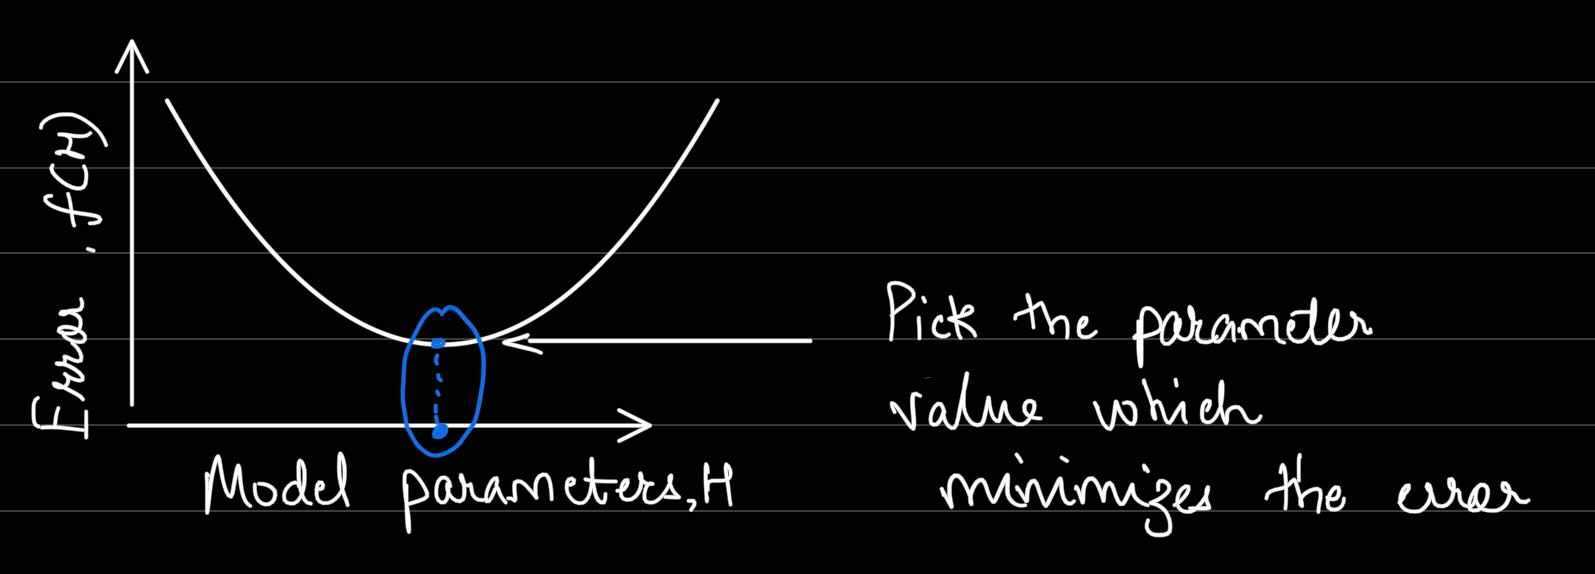


# Line fitting using GD

Recall from our previous notebook, that the model prediction $\hat{Y}_{(1\times N)} = H_{(1\times 2)}X_{(2\times N)}$, where $X$ is denoted as $[x_i, 1]^T$ for $i \in [0...N]$.

One of the error functions, Euclidean distance is given by:

$f(H) = \frac{1}{N} \sqrt{\sum_{i=1}^{N} (y_i - \hat{y}_i(H))^2 } $

We need to find, $\nabla f(H)$, which is the gradient of function $f$ with respect to $H$.

The above equation is cumbersome to differentiate. Another error function, known as the mean squared error (MSE) loss achieves the same objective while greatly simplifying the derivative.

$f(H) = \frac{1}{2N} \sum_{i=1}^{N} (y_i - \hat{y}_i(H))^2$

# Gradient

Our model comprises of two independant parameters, $M$ and $C$.

$M^+$ $\leftarrow M - \alpha \nabla f(M)$

 $C^+$ $\leftarrow C - \alpha \nabla f(C)$

 Let us derive the parameter update rule for $M$;
 
 $\nabla f(M) = \frac{\delta (\frac{1}{2N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2)}{\delta M}$

 $\nabla f(M) = \frac{1}{2N} \sum_{i=1}^{N} \frac{\delta}{\delta M} (y_i - \hat{y}_i)^2$

 $\nabla f(M) = \frac{1}{2N} \sum_{i=1}^{N} 2(y_i - \hat{y}_i)(-\frac{\delta}{\delta M}\hat{y}_i)$

$\nabla f(M) = \frac{1}{N} \sum_{i=1}^{N} ( \hat{y}_i - y_i) x_i$
 



# Homework

Derive the parameter update rule for $C$

# Solution

Please enter your solution here.

Your work should result in the following equation:
$\nabla f(C) = \frac{1}{N} \sum_{i=1}^{N} ( \hat{y}_i - y_i)$



In [139]:
def forward(model, x):
  return model['slope']*x + model['intercept']

The recovered slope is: 2.207684. Groundtruth is: 2.253063
The recovered intercept is: 0.026445. Groundtruth is: 4.337611


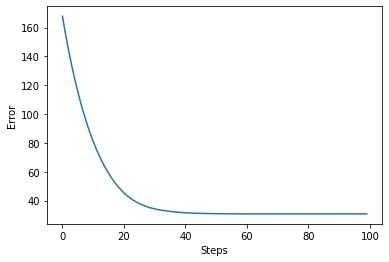

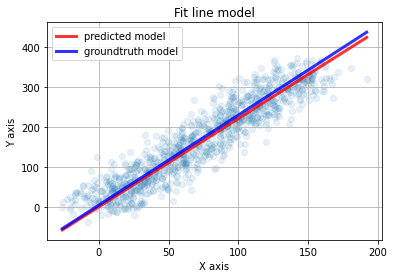

In [140]:
x_inputs, y_gt, gt_params = generate_points(add_noise=True)
num_pts = len(x_inputs)

model = {}

model['slope'] = 0 #  1000*np.random.rand() - 500  # Some crazy random number
model['intercept'] = 0  # 1000*np.random.rand() - 500  # Some crazy random number

model['error'] = []
model['step'] = []

alpha = 1e-5  # Set the learning rate
steps = 100

for step in range(steps):

  y_preds = forward(model, x_inputs)

  model['slope'] = model['slope'] - alpha*np.mean((y_preds - y_gt)*x_inputs)
  model['intercept'] = model['intercept'] - alpha*np.mean(y_preds - y_gt)
  model['error'].append(np.mean(np.abs(y_preds - y_gt)))
  model['step'].append(step)

fig, axs = plt.subplots()
axs.plot(model['step'], model['error'])
axs.set_xlabel('Steps')
axs.set_ylabel('Error')

print('The recovered slope is: %f. Groundtruth is: %f' % (model['slope'], gt_params['slope']))
print('The recovered intercept is: %f. Groundtruth is: %f' % ( model['intercept'], gt_params['intercept']))


pred_line = [x_inputs.min(),
             x_inputs.max(),
             forward(model, x_inputs.min()),
             forward(model, x_inputs.max())]
gt_line = [x_inputs.min(),
           x_inputs.max(),
           forward(gt_params, x_inputs.min()),
           forward(gt_params, x_inputs.max())]

fig, axs = plt.subplots()
axs.scatter(x_inputs, y_gt, alpha=0.1)
axs.plot(pred_line[:2], pred_line[2:], 'r-', linewidth=3, alpha=0.8)
axs.plot(gt_line[:2], gt_line[2:], 'b-', linewidth=3, alpha=0.8)
axs.set_xlabel('X axis')
axs.set_ylabel('Y axis')
axs.axis('on')
axs.grid('on')
axs.set_title('Fit line model')
axs.legend(['predicted model', 'groundtruth model'])